# Classification Challenges
Challenge Set 5<br/>
Allison and Graham<br/>
Aug 1, 2016
***

In [ ]:
import re
import pandas as pd
import numpy as np
import csv


In [ ]:
df_congress = pd.read_csv('house-votes-84.data.txt')

In [98]:
df_congress.head()

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,0.000000,1,0,1.000000,1.00000,1,0,0,0,0,0,1.000000,1,1,0,0.812121,republican
1,0.443128,1,1,0.416076,1.00000,1,0,0,0,0,1,0.000000,1,1,0,0.000000,democrat
2,0.000000,1,1,0.000000,0.50358,1,0,0,0,0,1,0.000000,1,0,0,1.000000,democrat
3,1.000000,1,1,0.000000,1.00000,1,0,0,0,0,1,0.421836,1,1,1,1.000000,democrat
4,0.000000,1,1,0.000000,1.00000,1,0,0,0,0,0,0.000000,1,1,1,1.000000,democrat


### Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [ ]:
df_congress = df_congress.replace(['y','n'], [1,0,])
df_congress = df_congress.replace('?', np.NaN)
df_congress = df_congress.fillna(df_congress.mean())
df_congress.rename(columns=lambda x: re.sub('\.','',x), inplace=True)
df_congress['republican'] = df_congress['republican'].apply(lambda x: re.sub('\.', '', x).strip())
df_congress.head(2)

In [145]:
len(df_congress)

434

### Challenge 2

Split the data into a test and training set. Use this function:
from sklearn.cross_validation import train_test_split


In [177]:
import sklearn
from sklearn import cross_validation as cv
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from patsy import dmatrix

X = dmatrix('n + y + n1 + y1 + y2 + y3 + n2 + n3 + n4 + y4 + y9 + y5 + y6 + y7 + n5 + y8',
               data = df_congress, return_type='dataframe')

y= df_congress['republican']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 333)

In [163]:
#y = y['republican[republican]']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: republican[republican], dtype: float64

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

In [147]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

max_accuracy = {}
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train, y_train)
    acc = accuracy_score(y_test, model.predict(x_test))
    max_accuracy[i] = acc
    
max(max_accuracy, key=max_accuracy.get)
                     

,republican[republican]
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,1


### Challenge 4

Make a similar model but with `LogisticRegression` instead, calculate test accuracy.


In [94]:
len(y_train)

347

In [96]:
acc

0.90804597701149425

### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.


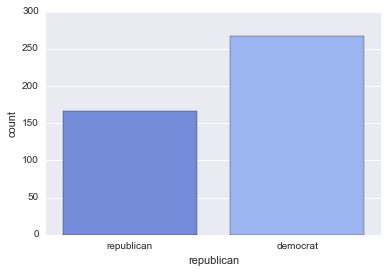

In [113]:
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette(sns.color_palette("coolwarm", 7))
import matplotlib.pyplot as plt
%matplotlib inline

#dems = len(df_congress[df_congress.republican=='republican'])
#pubs = len(df_congress[df_congress.republican=='democrat'])

ax = sns.countplot(x="republican", data=df_congress)

y = y['republican[republican]']


In [160]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: republican[republican], dtype: float64

In [178]:
logistics.fit(X, y)
logistics.predict(X)

array(['republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'republican', 'republican', 'republican', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'republican', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'republican', 'democrat', 'democrat', 'democrat',
      

In [176]:
d_acc = accuracy_score(y_test, ['democrat' for i in range(len(y_test))])
d_list = [d_acc for i in range(1, 21)]


//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [190]:
d_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [174]:
y_test = y_test['republican[republican]']

In [186]:
r_acc = accuracy_score(y_test, ['republican' for i in range(len(y_test))])
r_list = [r_acc for i in range(1, 21)]

In [133]:
dems = len(df_congress[df_congress.republican=='republican'])
pubs = len(df_congress[df_congress.republican=='democrat'])
dems, pubs

(167, 267)

In [166]:
y.unique()

array([ 1.,  0.])

### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.


In [192]:
r_list

[0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657,
 0.34482758620689657]

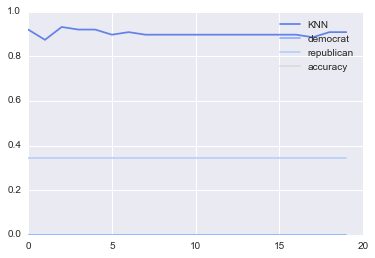

In [188]:
values = [v for k,v in max_accuracy.items()]

plt.plot(values, label='KNN')
plt.plot(d_list, label = 'democrat')
plt.plot(r_list, label = 'republican')
plt.plot(acc, label = 'accuracy')
plt.legend()

### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:


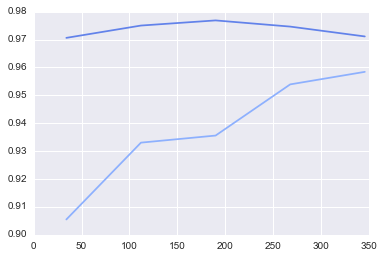

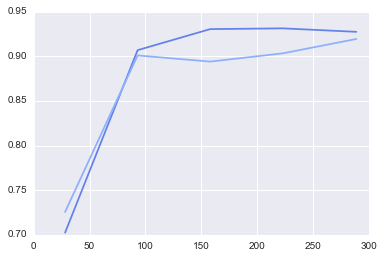

In [193]:
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC

 
train_sizes, train_scores, test_scores = learning_curve(logistics, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

 
plt.plot(train_sizes, train_scores_mean)
plt.plot(train_sizes, test_scores_mean)
plt.show()


train_sizes, train_scores, test_scores = learning_curve(knn, X, y)
train_scores_mean_2 = np.mean(train_scores, axis=1)
test_scores_mean_2 = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean_2)
plt.plot(train_sizes, test_scores_mean_2)
plt.show()

### Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for albl of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes


In [205]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_gaus = accuracy_score(y_test, gaussian.predict(x_test))
acc_gaus

0.91954022988505746

In [206]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
acc_svc = accuracy_score(y_test, svc.predict(x_test))
acc_svc

0.90804597701149425

In [208]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
acc_dtree = accuracy_score(y_test, d_tree.predict(x_test))
acc_dtree

0.90804597701149425

In [211]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
acc_forest = accuracy_score(y_test, forest.predict(x_test))
acc_forest

0.93103448275862066

### Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:
Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [218]:
from sklearn.cross_validation import cross_val_score
np.mean(cross_val_score(gaussian, X, y)),\
np.mean(cross_val_score(svc, X, y)),\
np.mean(cross_val_score(d_tree, X, y)),\
np.mean(cross_val_score(forest, X, y))


(0.93084291187739465,
 0.95387931034482765,
 0.94695083014048542,
 0.96312260536398464)

### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [258]:
vote_df = pd.read_csv('house-votes-84.data.txt')
vote_df.rename(columns=lambda x: re.sub('\.','',x), inplace=True)
vote_df.rename(columns={'?': 'y9'}, inplace=True)

vote_df = vote_df.replace(['y','n','?'], [1, 0, np.NaN])
vote_df = vote_df.fillna(vote_df.mode().iloc[0])

vote_df['republican'] = vote_df['republican'].apply(lambda x: re.sub('\.', '', x).strip())
vote_df.head(10)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,republican
1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,democrat
2,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,democrat
3,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,democrat
4,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1,democrat
5,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,1,democrat
6,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,republican
7,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,republican
8,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,democrat
9,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,republican


In [239]:
vote_df.columns

Index(['n', 'y', 'n1', 'y1', 'y2', 'y3', 'n2', 'n3', 'n4', 'y4', 'y9', 'y5',
       'y6', 'y7', 'n5', 'y8', 'republican'],
      dtype='object')

In [262]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

X = dmatrix('n + n1 + y1 + y2 + y3 + n2 + n3 + n4 + y4 + y9 + y5 + y6 + y7 + n5 + y8',
               data = vote_df, return_type='dataframe')
y=  vote_df['y']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 333)
logistics = LogisticRegression()
logistics.fit(x_train, y_train)

acc = accuracy_score(y_test, logistics.predict(x_test))
acc

0.63218390804597702